# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/vscode-projects/Global_Methane_Flux_Analysis/Global_Methane_Flux_Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/vscode-projects/Global_Methane_Flux_Analysis/Global_Methane_Flux_Analysis'

# Section 2: Visualizations

Section 2 Load Cleaned Data

In [4]:
import pandas as pd

df = pd.read_csv('Dataset/cleaned/Methane_final_cleaned.csv')
df

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1417,Russia & Caspian,Uzbekistan,5.676000,Energy,Other from coal,All,2022
1418,Russia & Caspian,Uzbekistan,16.973917,Energy,Other from oil and gas,All,2022
1419,Russia & Caspian,Uzbekistan,18.299999,Energy,Satellite-detected large oil and gas emissions,All,2022
1420,Russia & Caspian,Uzbekistan,780.916138,Energy,Total,All,2022


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

---

Section 2 content

In [ ]:
df_top_emissions_country=df.sort_values(by='emissions', ascending=False)[['country','region', 'emissions','type','baseYear']]
#top countries sorted by emissions, but including duplicate data with total

In [17]:
df_top_emissions_country

,country,region,emissions,type,baseYear
438,China,Asia Pacific,25372.222656,Energy,2022
420,China,Asia Pacific,18501.914062,Agriculture,2019-2021
440,India,Asia Pacific,18358.517578,Agriculture,2019-2021
1388,Russia,Russia & Caspian,18078.083984,Energy,2022
1309,United States,North America,16769.630859,Energy,2022
...,...,...,...,...,...
1319,Other,Other,0.001951,Energy,2022
224,Morocco,Africa,0.001264,Energy,2022
901,Netherlands,Europe,0.001164,Energy,2022
906,Netherlands,Europe,0.001081,Energy,2022


In [67]:
df_segment_total=df[df['segment']== 'Total'][['country', 'emissions','type','region','baseYear']]#only looking into type=total as I dont want to see the sub items yet 

In [68]:
df_segment_total20=df_segment_total.sort_values(by='emissions', ascending=False)

---

In [77]:
fig = px.bar(df_segment_total20, x='emissions', y='country',color="type",barmode="stack", title='Bar Chart of Global Methane Emissions',hover_data=['region','baseYear'])

fig.show()

In [73]:
df_segment_total_int5=df_segment_total[
    df_segment_total['country'].isin(['China', 'Russia', 'United States', 'Brazil', 'India'])
].sort_values(by='emissions', ascending=False)


In [91]:
fig = px.bar(df_segment_total_int5, x='country', y='emissions',text='emissions',color="type",barmode="stack", title='Bar Chart of Top 5 Global Methane Emissions',category_orders={
        "country": ['China', 'United States','India', 'Russia', 'Brazil']},hover_data=['region','baseYear'] 
    )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=3.5, uniformtext_mode='hide')
fig.show()

In [100]:
df['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Liberia', 'Libya', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Australia',
       'Bangladesh', 'Brunei', 'China', 'India', 'Indonesia', 'Japan',
       'Korea', 'Malaysia', 'Mongolia', 'New Zealand',
       'Other countries in Southeast Asia', 'Pakistan', 'Philippines',
       'Thailand', 'Vietnam', 'Argentina', 'Bolivia', 'Brazil',
       'Colombia', 'Cuba', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Denmark',
       'Estonia', 'European Union', 'France', 'Germany', 'Israel',
      

In [98]:
df_targeted_countries=df['country'].unique()

In [120]:
country_coords_int = {
    'Algeria': [28.0339, 1.6596],
    'Angola': [-11.2027, 17.8739],
    'Benin': [9.3077, 2.3158],
    'Botswana': [-22.3285, 24.6849],
    'Cameroon': [7.3697, 12.3547],
    'Central African Republic': [6.6111, 20.9394],
    'Chad': [15.4542, 18.7322],
    'Congo': [-0.228, 15.8277],
    "Cote d'Ivoire": [7.54, -5.5471],
    'Democratic Republic of Congo': [-4.0383, 21.7587],
    'Egypt': [26.8206, 30.8025],
    'Equatorial Guinea': [1.6508, 10.2679],
    'Eritrea': [15.1794, 39.7823],
    'Ethiopia': [9.145, 40.4897],
    'Gabon': [-0.8037, 11.6094],
    'Gambia': [13.4432, -15.3101],
    'Ghana': [7.9465, -1.0232],
    'Guinea': [9.9456, -9.6966],
    'Guinea-Bissau': [11.8037, -15.1804],
    'Kenya': [-0.0236, 37.9062],
    'Liberia': [6.4281, -9.4295],
    'Libya': [26.3351, 17.2283],
    'Morocco': [31.7917, -7.0926],
    'Mozambique': [-18.6657, 35.5296],
    'Namibia': [-22.9576, 18.4904],
    'Niger': [17.6078, 8.0817],
    'Nigeria': [9.082, 8.6753],
    'Senegal': [14.4974, -14.4524],
    'Seychelles': [-4.6796, 55.492],
    'Sierra Leone': [8.4606, -11.7799],
    'Somalia': [5.1521, 46.1996],
    'South Africa': [-30.5595, 22.9375],
    'South Sudan': [6.877, 31.307],
    'Sudan': [12.8628, 30.2176],
    'Tanzania': [-6.369, 34.8888],
    'Togo': [8.6195, 0.8248],
    'Tunisia': [33.8869, 9.5375],
    'Australia': [-25.2744, 133.7751],
    'Bangladesh': [23.685, 90.3563],
    'Brunei': [4.5353, 114.7277],
    'China': [35.8617, 104.1954],
    'India': [20.5937, 78.9629],
    'Indonesia': [-0.7893, 113.9213],
    'Japan': [36.2048, 138.2529],
    'Korea': [35.9078, 127.7669],
    'Malaysia': [4.2105, 101.9758],
    'Mongolia': [46.8625, 103.8467],
    'New Zealand': [-40.9006, 174.886],
    'Pakistan': [30.3753, 69.3451],
    'Philippines': [13.41, 122.56],
    'Thailand': [15.87, 100.9925],
    'Vietnam': [14.0583, 108.2772],
    'Brazil': [-14.235, -51.9253],
    'United States': [37.0902, -95.7129],
    'Russia': [61.524, 105.3188],
    'United Kingdom': [55.3781, -3.4360],
    'Germany': [51.1657, 10.4515],
    'France': [46.2276, 2.2137],
    'European Union': [50.1109, 8.6821],  # near Frankfurt, DE (central EU location)
    'Other EU17 countries': [51.0, 10.0],  # roughly central western Europe
    'Other EU7 countries': [50.5, 13.0],   # around Czech Republic / Austria area
    'Other countries in Southeast Asia': [5.0, 115.0],  # general Borneo/SEA midpoint
    'United Arab Emirates': [23.4241, 53.8478],# UAE centroid
    'Other': [-6.5, 155.0],  # Near Solomon Islands / Papua New Guinea / Pacific center
    'Iran': [32.4279, 53.6880],
    'Turkmenistan': [38.9697, 59.5563],
    'Argentina': [-38.4161, -63.6167],
    'Saudi Arabia': [23.8859, 45.0792],
    'Kazakhstan': [48.0196, 66.9237],
    'Venezuela': [6.4238, -66.5897],
    'Bolivia': [-16.2902, -63.5887],
'Colombia': [4.5709, -74.2973],
'Cuba': [21.5218, -77.7812],
'Ecuador': [-1.8312, -78.1834],
'Guyana': [4.8604, -58.9302],
'Paraguay': [-23.4425, -58.4438],
'Peru': [-9.1900, -75.0152],
'Trinidad and Tobago': [10.6918, -61.2225],
'Uruguay': [-32.5228, -55.7658],
'Denmark': [56.2639, 9.5018],
'Estonia': [58.5953, 25.0136],
'Israel': [31.0461, 34.8516],
'Italy': [41.8719, 12.5674],
'Netherlands': [52.1326, 5.2913],
'Norway': [60.472, 8.4689],
'Other countries in Europe': [54.526, 15.2551],
'Poland': [51.9194, 19.1451],
'Romania': [45.9432, 24.9668],
'Slovenia': [46.1512, 14.9955],
'Sweden': [60.1282, 18.6435],
'Ukraine': [48.3794, 31.1656],
'Bahrain': [26.0667, 50.5577],
'Iraq': [33.2232, 43.6793],
'Jordan': [30.5852, 36.2384],
'Kuwait': [29.3117, 47.4818],
'Lebanon': [33.8547, 35.8623],
'Oman': [21.5126, 55.9233],
'Qatar': [25.276987, 51.520008],
'Syria': [34.8021, 38.9968],
'Yemen': [15.5527, 48.5164],
'Canada': [56.1304, -106.3468],
'Mexico': [23.6345, -102.5528],
'Azerbaijan': [40.1431, 47.5769],
'Uzbekistan': [41.3775, 64.5853]
}

In [122]:
#mapbox for top 5 countries and then expanded to global

# Define the target countries
target_countries = ['China', 'United States', 'India', 'Russia', 'Brazil']

# Create a lookup for lat/lon
country_coords = {
    'China': [35.8617, 104.1954],
    'United States': [37.0902, -95.7129],
    'India': [20.5937, 78.9629],
    'Russia': [61.5240, 105.3188],
    'Brazil': [-14.2350, -51.9253]
}

# Filter the DataFrame for selected countries
df_filtered = df_segment_total20[df_segment_total20['country'].isin(df_targeted_countries)].copy()

# Add lat/lon columns
df_filtered['lat'] = df_filtered['country'].map(lambda c: country_coords_int[c][0])
df_filtered['lon'] = df_filtered['country'].map(lambda c: country_coords_int[c][1])

# Plot with Mapbox
fig = px.scatter_mapbox(
    df_filtered,
    lat='lat',
    lon='lon',
    size='emissions',
    color='country',
    hover_name='country',
    hover_data={'emissions': True, 'lat': False, 'lon': False,'region': True,'baseYear': True,'type': True},
    zoom=1,
    size_max=50,
    title='Global Emissions Map',
    mapbox_style='carto-positron'
)

fig.show()

In [137]:
df_segment_total.groupby('country', as_index=False).sum(numeric_only=True).query('emissions < 130').sort_values(by='emissions') # bottom emission countries global
    

,country,emissions
80,Seychelles,2.570026
51,Liberia,28.580852
32,Gambia,43.655927
11,Brunei,54.024805
36,Guinea-Bissau,61.595277
82,Slovenia,74.066556
27,Estonia,76.677326
91,Togo,107.866121
37,Guyana,113.281854
50,Lebanon,129.004585


In [ ]:
df_segment_total.groupby('country', as_index=False).sum(numeric_only=True).query('emissions < 130').sort_values(by='emissions').merge(df_segment_total[['country', 'region']].drop_duplicates(), on='country', how='left')[['country', 'region', 'emissions']]
#regions added

,country,region,emissions
0,Seychelles,Africa,2.570026
1,Liberia,Africa,28.580852
2,Gambia,Africa,43.655927
3,Brunei,Asia Pacific,54.024805
4,Guinea-Bissau,Africa,61.595277
5,Slovenia,Europe,74.066556
6,Estonia,Europe,76.677326
7,Togo,Africa,107.866121
8,Guyana,Central and South America,113.281854
9,Lebanon,Middle East,129.004585


In [149]:
df_continents_total=df_segment_total.groupby('region', as_index=False).sum(numeric_only=True)

In [150]:
df_continents_total


,region,emissions
0,Africa,38184.797715
1,Asia Pacific,132135.516548
2,Central and South America,37588.235362
3,Europe,41471.322392
4,Middle East,21733.309996
5,North America,41812.706360
6,Other,12894.389160
7,Russia & Caspian,35411.705814


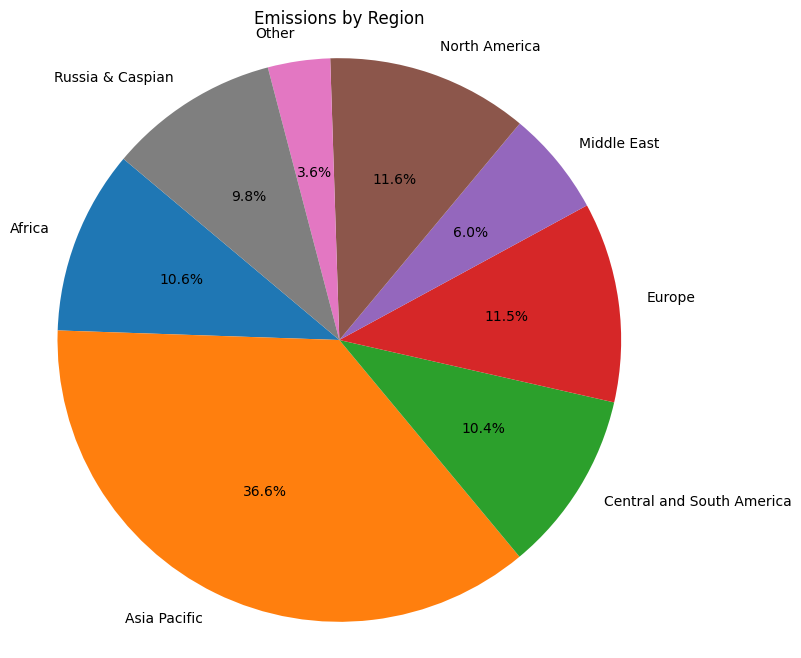

In [151]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    df_continents_total['emissions'],
    labels=df_continents_total['region'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Emissions by Region')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

In [132]:
df_segment_total_bottom10=df_segment_total[
    df_segment_total['country'].isin(['Seychelles', 'Liberia', 'Gambia', 'Brunei', 'Guinea-Bissau','Slovenia','Estonia','Togo','Guyana','Lebanon'])
].sort_values(by='emissions', ascending=True)

In [141]:
fig = px.bar(df_segment_total_bottom10, x='country', y='emissions',text='emissions',color="type",barmode="stack", title='Bottom 10 Global Methane Emissions Countries',category_orders={
        "country": ['Seychelles', 'Liberia', 'Gambia', 'Brunei', 'Guinea-Bissau','Slovenia','Estonia','Togo','Guyana','Lebanon']},hover_data=['region','baseYear'] 
    )
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=3.5, uniformtext_mode='hide')
fig.show()

In [ ]:
df[df['country'] == 'China'] #with total

,region,country,emissions,type,segment,reason,baseYear
420,Asia Pacific,China,18501.914062,Agriculture,Total,All,2019-2021
421,Asia Pacific,China,984.200012,Energy,Bioenergy,All,2022
422,Asia Pacific,China,5418.770020,Energy,Coking coal,All,2022
423,Asia Pacific,China,552.119995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
424,Asia Pacific,China,294.390991,Energy,Gas pipelines and LNG facilities,Vented,2022
425,Asia Pacific,China,16.911100,Energy,Offshore gas,Fugitive,2022
426,Asia Pacific,China,36.693699,Energy,Offshore gas,Vented,2022
427,Asia Pacific,China,15.842800,Energy,Offshore oil,Flared,2022
428,Asia Pacific,China,18.197001,Energy,Offshore oil,Fugitive,2022
429,Asia Pacific,China,246.535004,Energy,Offshore oil,Vented,2022


In [163]:
#visual to display types

df_china_no_total_energy=df[(df['country'] == 'China') & (df['type'] == 'Energy') & (df['segment'] != 'Energy')] #without total

In [164]:
df[(df['country'] == 'China') & (df['type'] == 'Energy') & (df['segment'] != 'Energy')]

,region,country,emissions,type,segment,reason,baseYear
421,Asia Pacific,China,984.200012,Energy,Bioenergy,All,2022
422,Asia Pacific,China,5418.770020,Energy,Coking coal,All,2022
423,Asia Pacific,China,552.119995,Energy,Gas pipelines and LNG facilities,Fugitive,2022
424,Asia Pacific,China,294.390991,Energy,Gas pipelines and LNG facilities,Vented,2022
425,Asia Pacific,China,16.911100,Energy,Offshore gas,Fugitive,2022
426,Asia Pacific,China,36.693699,Energy,Offshore gas,Vented,2022
427,Asia Pacific,China,15.842800,Energy,Offshore oil,Flared,2022
428,Asia Pacific,China,18.197001,Energy,Offshore oil,Fugitive,2022
429,Asia Pacific,China,246.535004,Energy,Offshore oil,Vented,2022
430,Asia Pacific,China,254.276001,Energy,Onshore gas,Fugitive,2022


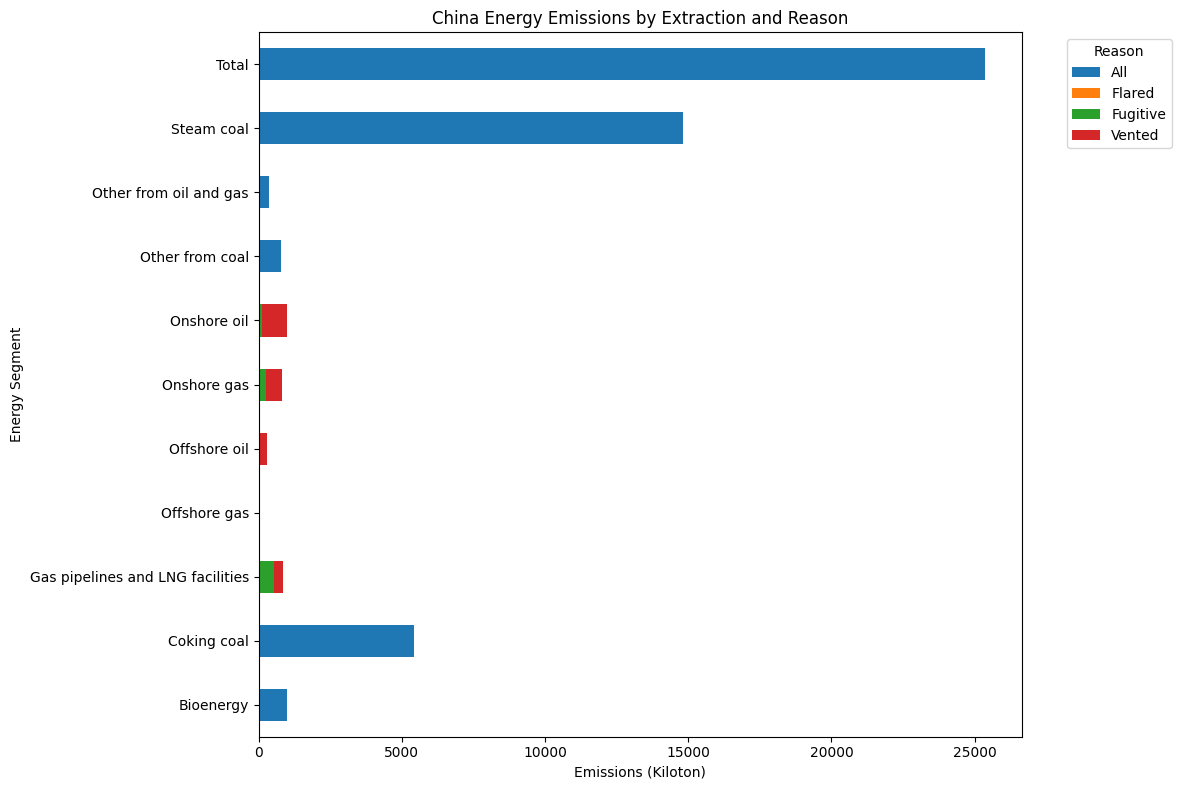

In [169]:
# Group and reshape data for stacked bar
df_ch_grouped = df_china_no_total_energy.groupby(['segment', 'reason'])['emissions'].sum().unstack(fill_value=0)

# Plot horizontal stacked bar chart
df_ch_grouped.plot(kind='barh', stacked=True, figsize=(12, 8))

# Labels and styling
plt.title('China Energy Emissions by Extraction and Reason')
plt.xlabel('Emissions (Kiloton)')
plt.ylabel('Energy Segment')
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [9]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)